<a href="https://colab.research.google.com/github/Sedighe-Raeisi/Persian_Digits_Classifier/blob/main/Persian_Digits_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clssifier for persian Digits:

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as mfm
import os
import numpy as np
import seaborn as sn

import cv2

In [ ]:
persian_num=['٠','١', '٢' ,'٣','٤','٥','٦','٧','٨','٩']

In [ ]:
persian_n=[['٠'],['١'],['٢'],['٣'],['٤','۴'],['٥','۵'],['٦','۶'],['٧'],['٨'],['٩']]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mypath='/content/drive/MyDrive/MachineLearning/font'

In [ ]:
font_name=os.listdir(mypath)

In [ ]:
# len of oll fonts:
len(font_name)

503


##We sudy fonts for appropriate fonts, those fonts which works with matplotlib

In [ ]:
# This block was for testing fonts, and then we found some fonts are not working with matplotlib. Then we made a list from appropriate fonts.
cc='۴'
for font in font_name:#[150:200]:
# plt.rc('axes', unicode_minus=False)
  fig = plt.figure()
  renderer = fig.canvas.get_renderer()
  font_path = mypath+'/'+font
  prop = mfm.FontProperties(fname=font_path)
  plt.text(0.4, 0.35, s=cc, fontproperties=prop, fontsize=160)
  plt.axis('off')
  font_n=font.split('.')[0]
  # plt.show()
  # print(font)
  path='/content/drive/MyDrive/MachineLearning/png/'
  plt.savefig(path+font_n+'.png', bbox_inches='tight', pad_inches=0)

we tryed to use warning lib and try- exception to remove unvisible fonts, but it didn't work. Therefore, we genrated images and downloaded them and rmoved the courrupted fonts. then we uploaded the remaing images in following direcory. now we take their named to generate our dataset. 

In [ ]:
my_okPath='/content/drive/MyDrive/MachineLearning/png'

In [ ]:
okfont_name=os.listdir(my_okPath)

In [ ]:
ok_font=[]
for name in okfont_name:
  ok_font.append(name.split('.')[0]+'.ttf')

In [ ]:
#len of ok fonts:
len(ok_font)

160

If we want these names match font names, we should convert the format of all fonts from TTF to ttf

In [ ]:
# do not operate it again:
for name in font_name:
  scr=mypath+'/'+name

  dest=mypath+'/'+name.split('.')[0]+'.ttf'
  os.rename(scr,dest)


##Now we genrate our images for ok fonts:

In [ ]:
my_okPath='/content/drive/MyDrive/MachineLearning/png'
okfont_name=os.listdir(my_okPath)

This is how we can both create and save images

In [ ]:
# os.mkdir('/content/drive/MyDrive/MachineLearning/s_png2/')

In [ ]:

from tensorflow.keras.utils import img_to_array, to_categorical

In [ ]:
i=0
for num in persian_n:
  
  
  for uni_char in num:
    for font in ok_font:
      fig = plt.figure()
      renderer = fig.canvas.get_renderer()
      font_path = mypath+'/'+font
      prop = mfm.FontProperties(fname=font_path)
      fig.set_size_inches(.4, .4)
      plt.text(0.05, 0.05, s=uni_char, fontproperties=prop, fontsize=30)
      plt.axis('off')
      
      font_n=font.split('.')[0]
      
      path='/content/drive/MyDrive/MachineLearning/s_png3/'
      plt.savefig(path+str(i)+'_'+font_n+'.png', bbox_inches='tight', pad_inches=0,dpi=100)
  i=i+1

Instead of saving images we convert them to a numy array to use in our mode. Simultaneously, we create labels. 

In [ ]:
image_list=okfont_name=os.listdir('/content/drive/MyDrive/MachineLearning/s_png3/')



###Lets look at one sample

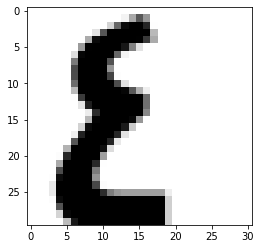

In [ ]:
image_sample1=cv2.imread('/content/drive/MyDrive/MachineLearning/s_png3/4_BTrafcBd.png')

plt.imshow(image_sample1);


In [ ]:
image_sample1.shape

(30, 31, 3)

In [ ]:
from PIL import Image, ImageOps

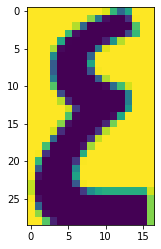

In [ ]:
img=Image.open('/content/drive/MyDrive/MachineLearning/s_png3/4_BTrafcBd.png').convert('L')

# img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# image_sample1=cv2.resize(image_sample1,(50,50))
thresh = img.point(lambda p: p < 64 and 255)
bbox1 = img.getbbox()
crop1 = img.crop(bbox1)
crop1n = ImageOps.invert(crop1)
bbox2  = crop1n.getbbox()
result = img.crop(bbox1).crop(bbox2)

plt.imshow(result)

In [ ]:
plt.figure(figsize = (12,12))
image_sample1=cv2.cvtColor(image_sample1,cv2.COLOR_BGR2GRAY)
img=cv2.resize(image_sample1,(50,50))
sn.heatmap(image_sample1, annot=True,fmt="d",cmap="YlGnBu")


## Here we crop image to a rectangle of interest and then we save them again:

In [ ]:
from PIL import Image, ImageOps

In [ ]:
os.mkdir('/content/drive/MyDrive/MachineLearning/s_croped_png')

In [ ]:
croped_png='/content/drive/MyDrive/MachineLearning/s_croped_png/'

for image_name in image_list:
  img=Image.open('/content/drive/MyDrive/MachineLearning/s_png3/'+image_name).convert('L')
  thresh = img.point(lambda p: p < 64 and 255)
  bbox1 = img.getbbox()
  crop1 = img.crop(bbox1)
  crop1n = ImageOps.invert(crop1)
  bbox2  = crop1n.getbbox()
  result = img.crop(bbox1).crop(bbox2)
  result.save(croped_png+image_name)




##Reading and aonverting images to gray mode and then resizing and rescaling and converting to numpy array



###apply padding to images to make them of the same size

In [ ]:
croped_png='/content/drive/MyDrive/MachineLearning/s_croped_png/'

In [ ]:
image_list=okfont_name=os.listdir('/content/drive/MyDrive/MachineLearning/s_png3/')

In [ ]:
max_width=0
max_height=0
for image_name in image_list:
  img=cv2.imread(croped_png+image_name)
  if img.shape[1]>max_width:max_width=img.shape[1]
  if img.shape[0]>max_height:max_height=img.shape[0]
  

In [ ]:
print(max_height,max_width)

68 63


In [ ]:
from tensorflow.keras.utils import img_to_array, to_categorical

In [ ]:
path='/content/drive/MyDrive/MachineLearning/s_croped_png/'

In [ ]:
labels=[]
data=[]
siz=[]
for image_name in image_list:
  label=int(image_name.split('_')[0])
  labels.append(label)

  image=cv2.imread(path+image_name)
  #make all images of the same size
  image=cv2.copyMakeBorder(image, (max_height-image.shape[0])//2, max_height-(image.shape[0]+((max_height-image.shape[0])//2)), (max_width-image.shape[1])//2, max_width-(image.shape[1]+((max_width-image.shape[1])//2)), cv2.BORDER_CONSTANT,value=(255,255,255))
  siz.append(list(image.shape))
  #bring all images to gray mode:
  image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  #Convert images to array:
  image=img_to_array(image)
  data.append(image)
labels=np.array(labels)
data=np.array(data,dtype='float')/255.0

In [ ]:
data.shape

(1600, 68, 63, 1)

In [ ]:
labels.shape

(1600,)

In [ ]:
labels=to_categorical(labels)

In [ ]:
labels.shape

(1600, 10)


##Prepairing the train and test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_train, data_test, label_train, label_test=train_test_split(data, labels, test_size=.2, random_state=42, shuffle=True)


##Prepairing the model

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten 

In [ ]:
data.shape

(1600, 68, 63, 1)

In [ ]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(data.shape[1],data.shape[2],1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 66, 61, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 33, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 12, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 9984)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='categorical_accuracy')

In [ ]:
model_hist=model.fit(data_train,label_train,epochs=10,validation_split=.2)

Epoch 1/10
32/32 [==============================] - 7s 198ms/step - loss: 2.1996 - categorical_accuracy: 0.2441 - val_loss: 1.6635 - val_categorical_accuracy: 0.4570
Epoch 2/10
32/32 [==============================] - 6s 192ms/step - loss: 0.9923 - categorical_accuracy: 0.6992 - val_loss: 0.7431 - val_categorical_accuracy: 0.7852
Epoch 3/10
32/32 [==============================] - 6s 191ms/step - loss: 0.5261 - categorical_accuracy: 0.8369 - val_loss: 0.4970 - val_categorical_accuracy: 0.8555
Epoch 4/10
32/32 [==============================] - 6s 191ms/step - loss: 0.3568 - categorical_accuracy: 0.8926 - val_loss: 0.3885 - val_categorical_accuracy: 0.8867
Epoch 5/10
32/32 [==============================] - 6s 192ms/step - loss: 0.2971 - categorical_accuracy: 0.9092 - val_loss: 0.3844 - val_categorical_accuracy: 0.8789
Epoch 6/10
32/32 [==============================] - 6s 190ms/step - loss: 0.2190 - categorical_accuracy: 0.9395 - val_loss: 0.3102 - val_categorical_accuracy: 0.9102
Epoc

In [ ]:
yt=np.argmax(label_test,axis=1)

In [ ]:
yp=model.predict(data_test)

In [ ]:
yp=np.argmax(yp,axis=1)


##Model Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(yp,yt)

0.925

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(yt,yp,normalize='true')

In [ ]:
import seaborn as sn

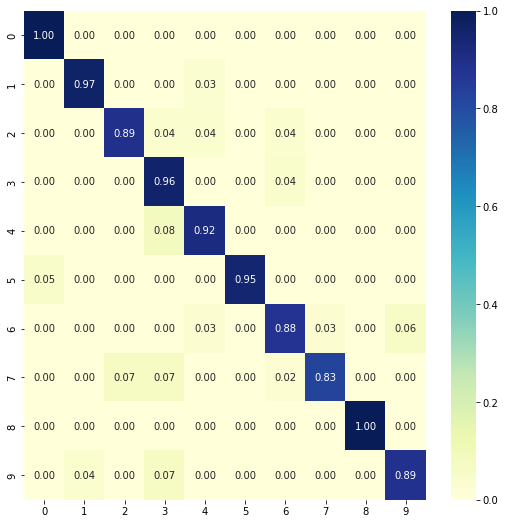

In [ ]:
plt.figure(figsize=[9,9])
sn.heatmap(cm, annot=True, fmt='.2f', cmap='YlGnBu')


##Accuracy and loss visualization 

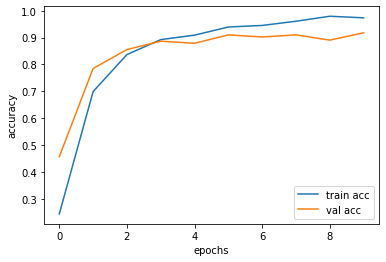

In [ ]:
plt.plot(model_hist.history['categorical_accuracy'],label='train acc')
plt.plot(model_hist.history['val_categorical_accuracy'],label='val acc')
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show();

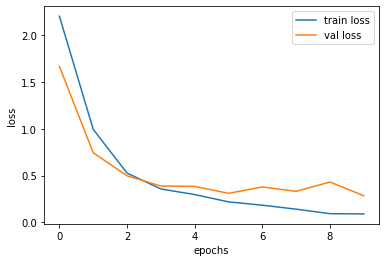

In [ ]:
plt.plot(model_hist.history['loss'],label='train loss')
plt.plot(model_hist.history['val_loss'],label='val loss')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show();

In [ ]:
model_path='/content/drive/MyDrive/MachineLearning/persian_minst2'
model.save(model_path)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MachineLearning/persian_minst2/assets
